# mushroom classification



In [1]:
import pandas as pd

import numpy as np

In [2]:
dataset= pd.read_csv('http://iali.in/datasets/mushrooms.csv')

In [3]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
dataset.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [6]:
dataset["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [7]:
dataset["cap-shape"].value_counts()   #stratified filtering

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [8]:

dataset["cap-color"].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [9]:
dataset["cap-surface"].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [10]:
df=dataset.drop(labels=["veil-type"],axis=1) #veil_type single value feature

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [13]:
df["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [14]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [15]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [16]:
#printing all unique ones
for x in range(len(df.columns)):
    print(df.columns[x] + ":")
    print(df[df.columns[x]].unique())
    print("")

class:
['p' 'e']

cap-shape:
['x' 'b' 's' 'f' 'k' 'c']

cap-surface:
['s' 'y' 'f' 'g']

cap-color:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises:
['t' 'f']

odor:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment:
['f' 'a']

gill-spacing:
['c' 'w']

gill-size:
['n' 'b']

gill-color:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape:
['e' 't']

stalk-root:
['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring:
['s' 'f' 'k' 'y']

stalk-surface-below-ring:
['s' 'f' 'y' 'k']

stalk-color-above-ring:
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring:
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-color:
['w' 'n' 'o' 'y']

ring-number:
['o' 't' 'n']

ring-type:
['p' 'e' 'l' 'f' 'n']

spore-print-color:
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population:
['s' 'n' 'a' 'v' 'y' 'c']

habitat:
['u' 'g' 'm' 'd' 'p' 'w' 'l']



In [17]:
#shalk root shows ? so lets explore
len(df[df['stalk-root']=='?'])

2480

In [18]:
df=df.drop(labels=['stalk-root'],axis=1)  #dropping it

In [19]:
#seperating labels and features

In [20]:
df_feature=df.drop('class',axis=1)


df_label=df['class'].copy()


In [21]:
#encoding data using one hot encoding

In [22]:
df_feature_en = pd.get_dummies(df_feature)
df_feature_en.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
#encoding target variable  here label encoding used 

In [24]:
from sklearn import preprocessing
le =preprocessing. LabelEncoder()
df_label_en = le.fit_transform(df_label.values.ravel())

In [25]:
df_label_en

array([1, 0, 0, ..., 0, 1, 0])

In [26]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_feature_en,
    df_label_en,
    test_size=0.2,
    stratify=df_label_en,
    random_state=42    
)

correlations

In [27]:
df_corr = pd.get_dummies(df)
#df_corr.head()
corr_matrix=df_corr.corr()
corr_matrix['class_e'].sort_values(ascending=False)

class_e                       1.000000
odor_n                        0.785557
ring-type_p                   0.540469
gill-size_b                   0.540024
bruises_t                     0.501530
                                ...   
gill-size_n                  -0.540024
stalk-surface-below-ring_k   -0.573524
stalk-surface-above-ring_k   -0.587658
odor_f                       -0.623842
class_p                      -1.000000
Name: class_e, Length: 113, dtype: float64

In [28]:
from pandas.plotting import scatter_matrix
attributes=["class_e","odor_n"]
#scatter_matrix(df_corr[attributes],figsize=(12,8))

logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_test, y_pred)

0.9987212276214833

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
param_grid = [{'C': np.logspace(-3, 3, 10)}]

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores = cross_val_score(
    estimator=grid_search,
    X=df_feature_en,
    y=df_label_en,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)

In [31]:
scores


array([0.99872123, 0.99743918, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

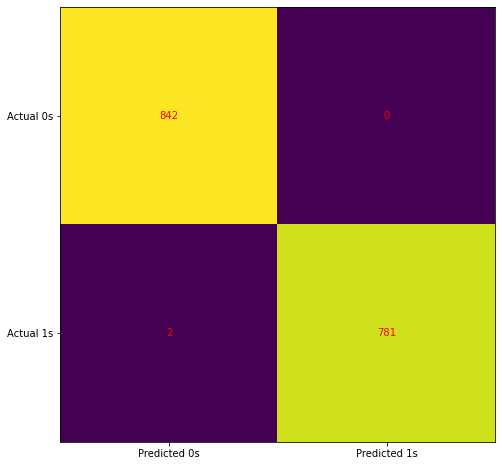

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()